## Reading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file

In [2]:
df_pass = pd.read_csv('International_Report_Passengers.csv')

## Analysis on top 10 busiest  US airport

In [3]:
df_pass.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [4]:
df_pass.shape

(680985, 16)

In [5]:
df_pass['Year'].unique()

array([2014, 2007, 2005, 2003, 2001, 2004, 2008, 2010, 2009, 2002, 2006,
       2013, 2011, 2012, 2015, 1992, 1993, 1990, 1999, 1997, 1996, 1995,
       1994, 1998, 1991, 2000, 2017, 2016, 2018, 2019, 2020], dtype=int64)

**We have data from 1991 to 2020**

In [6]:
df_pass['usg_apt'].value_counts().head(10)

JFK    64122
MIA    61939
LAX    47760
ORD    34952
EWR    33024
IAH    27225
ATL    24676
SFO    20618
BOS    20029
DFW    18856
Name: usg_apt, dtype: int64

**Top 10 bussiest US airport are the ones mentioned above.**

## Exploring JFK

In [7]:
df_pass[df_pass['usg_apt'] == 'JFK'].head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
33,03/01/2007,2007,3,12478,JFK,22,14849,SKB,275,20207,XP,1,Passengers,0,152,152
56,11/01/2002,2002,11,12478,JFK,22,12991,LIS,469,20210,PBQ,0,Passengers,0,17,17
83,06/01/2007,2007,6,12478,JFK,22,14210,POS,280,20415,NaN,1,Passengers,0,2159,2159
124,02/01/2007,2007,2,12478,JFK,22,15018,STN,493,20377,X9,1,Passengers,0,42,42
135,02/01/2005,2005,2,12478,JFK,22,10575,BGI,205,20210,PBQ,0,Passengers,0,18,18


### Total flights from JFK

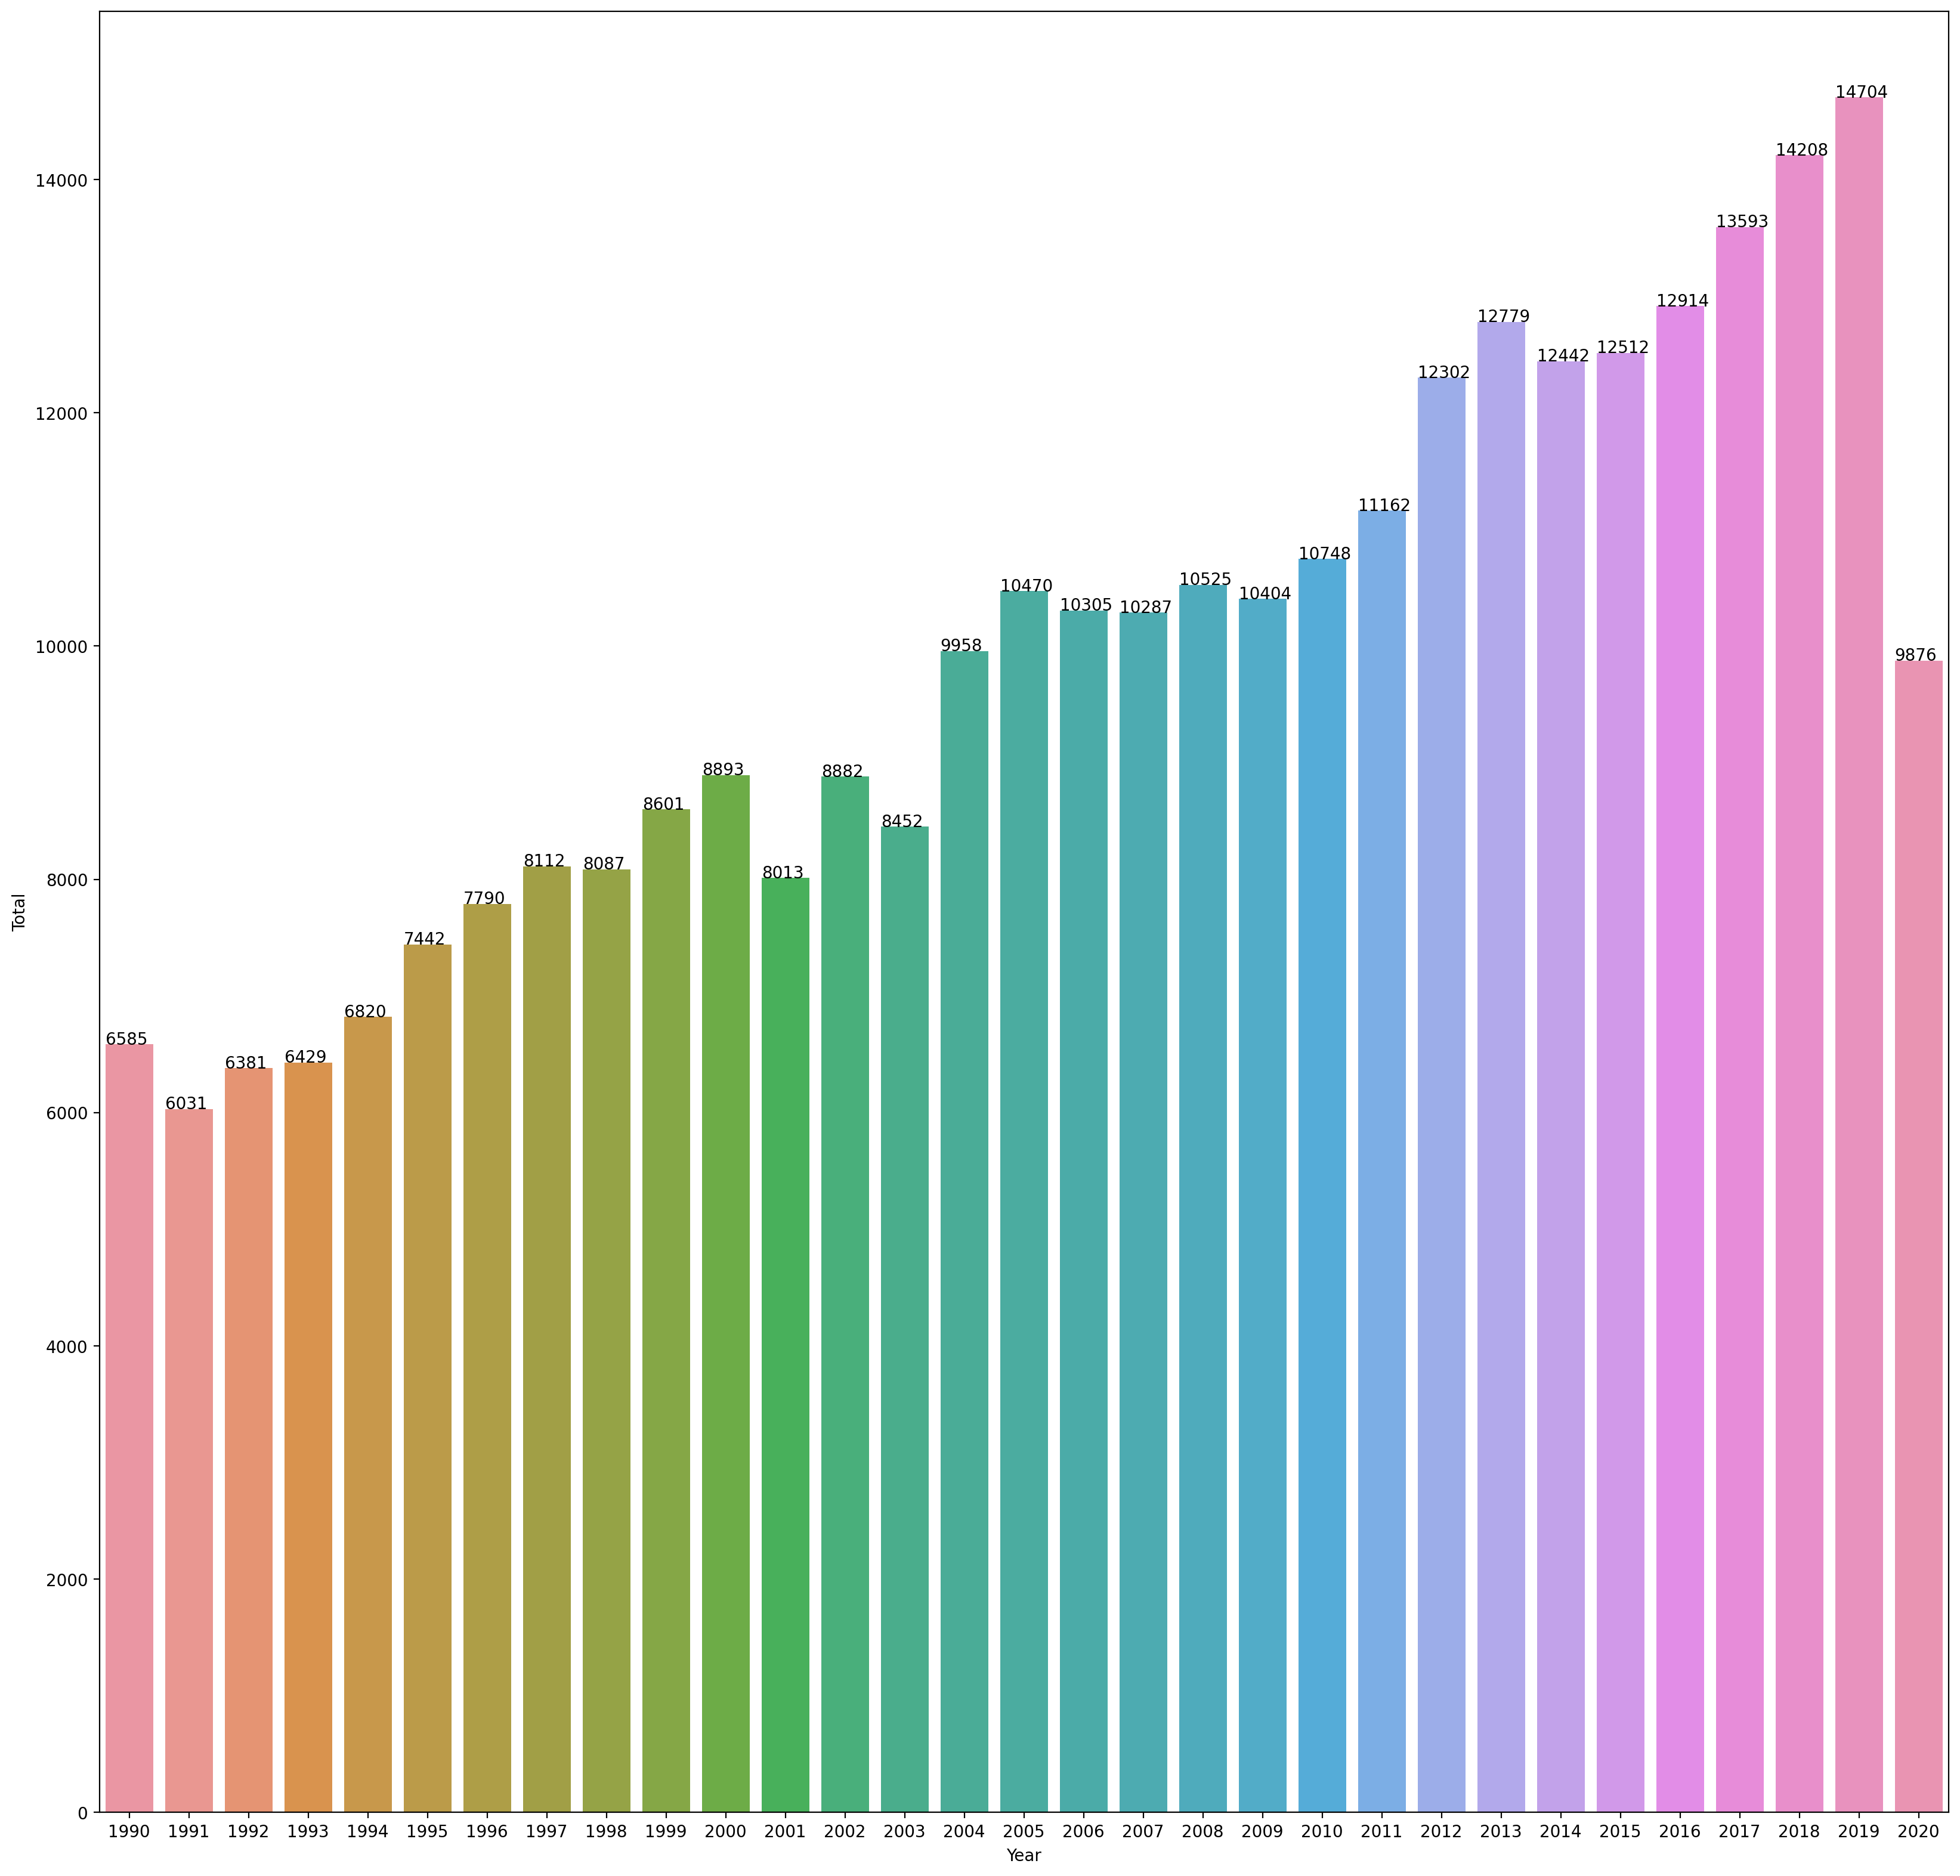

In [8]:
plt.figure(figsize=(20,20), dpi = 200)
ax = sns.barplot(data = df_pass[df_pass['usg_apt'] == 'JFK'] , x ='Year', y='Total', ci=None )
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x() ,p.get_height()))

**The JFK airport shows an increase in air traffic over the period of years. The highest traffic was observed in 2019 with 14704 flights crossing the US gateway.**

<Figure size 20000x400 with 0 Axes>

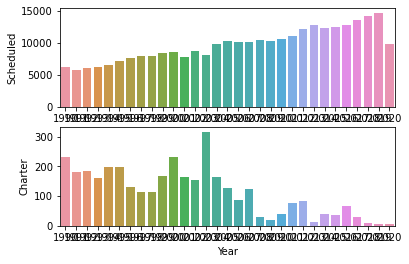

In [9]:
plt.figure(figsize=(100,2), dpi = 200)
fig,axes = plt.subplots(2)
sns.barplot(ax = axes[0], data = df_pass[df_pass['usg_apt'] == 'JFK'] , x ='Year', y='Scheduled', ci=None)
sns.barplot(ax = axes[1], data = df_pass[df_pass['usg_apt'] == 'JFK'] , x ='Year', y='Charter', ci=None )

plt.show()

**While the number of scheduled flights increased over the time period, number of chartered flights decreased.**

## Analyzing the FG gateway incoming traffic from JFK

In [10]:
df_pass[df_pass['usg_apt'] == 'JFK']['fg_apt'].value_counts().head() 

LHR    2041
FRA    1499
CDG    1428
CUN    1361
MAD    1345
Name: fg_apt, dtype: int64

**2041 flights flew from JFK to LHR**

## Which carrier flew the maximum no of times from JFK?

In [11]:
df_pass[df_pass['usg_apt'] == 'JFK']['carrier'].value_counts().head() 

DL    9694
AA    7487
B6    2899
TW    1918
BW    1475
Name: carrier, dtype: int64

**DL - Delta Airlines flew the highest.**

## Analysis on top 10 busiest Foreign gateways

In [12]:
df_pass.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [13]:
df_pass['fg_apt'].value_counts().head(10)

YYZ    43254
CUN    30401
YUL    18311
YVR    17875
MEX    17821
NRT    16608
LHR    15411
FRA    13763
NAS    13377
MBJ    11460
Name: fg_apt, dtype: int64

**YYZ - Toronto International Airport observed the maximm incoming traffic.**

## Exploring the YYZ airport Traffic

In [14]:
df_pass[df_pass['fg_apt'] == 'YYZ']

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
20,07/01/2006,2006,7,14100,PHL,23,16271,YYZ,936,20313,W8,0,Passengers,0,49,49
25,03/01/2008,2008,3,12223,HTS,39,16271,YYZ,936,20293,ZX,0,Passengers,0,5,5
28,02/01/2002,2002,2,13204,MCO,33,16271,YYZ,936,20065,SEQ,0,Passengers,0,693,693
35,11/01/2009,2009,11,12339,IND,42,16271,YYZ,936,19386,NW,1,Passengers,0,40,40
40,11/01/2010,2010,11,10397,ATL,34,16271,YYZ,936,19790,DL,1,Passengers,0,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680792,10/01/2018,2018,10,12953,LGA,22,16271,YYZ,936,19531,AC,0,Passengers,90237,0,90237
680801,05/01/2018,2018,5,12953,LGA,22,16271,YYZ,936,19531,AC,0,Passengers,90686,103,90789
680839,06/01/2018,2018,6,12953,LGA,22,16271,YYZ,936,19531,AC,0,Passengers,93182,110,93292
680872,07/01/2018,2018,7,12953,LGA,22,16271,YYZ,936,19531,AC,0,Passengers,95964,0,95964


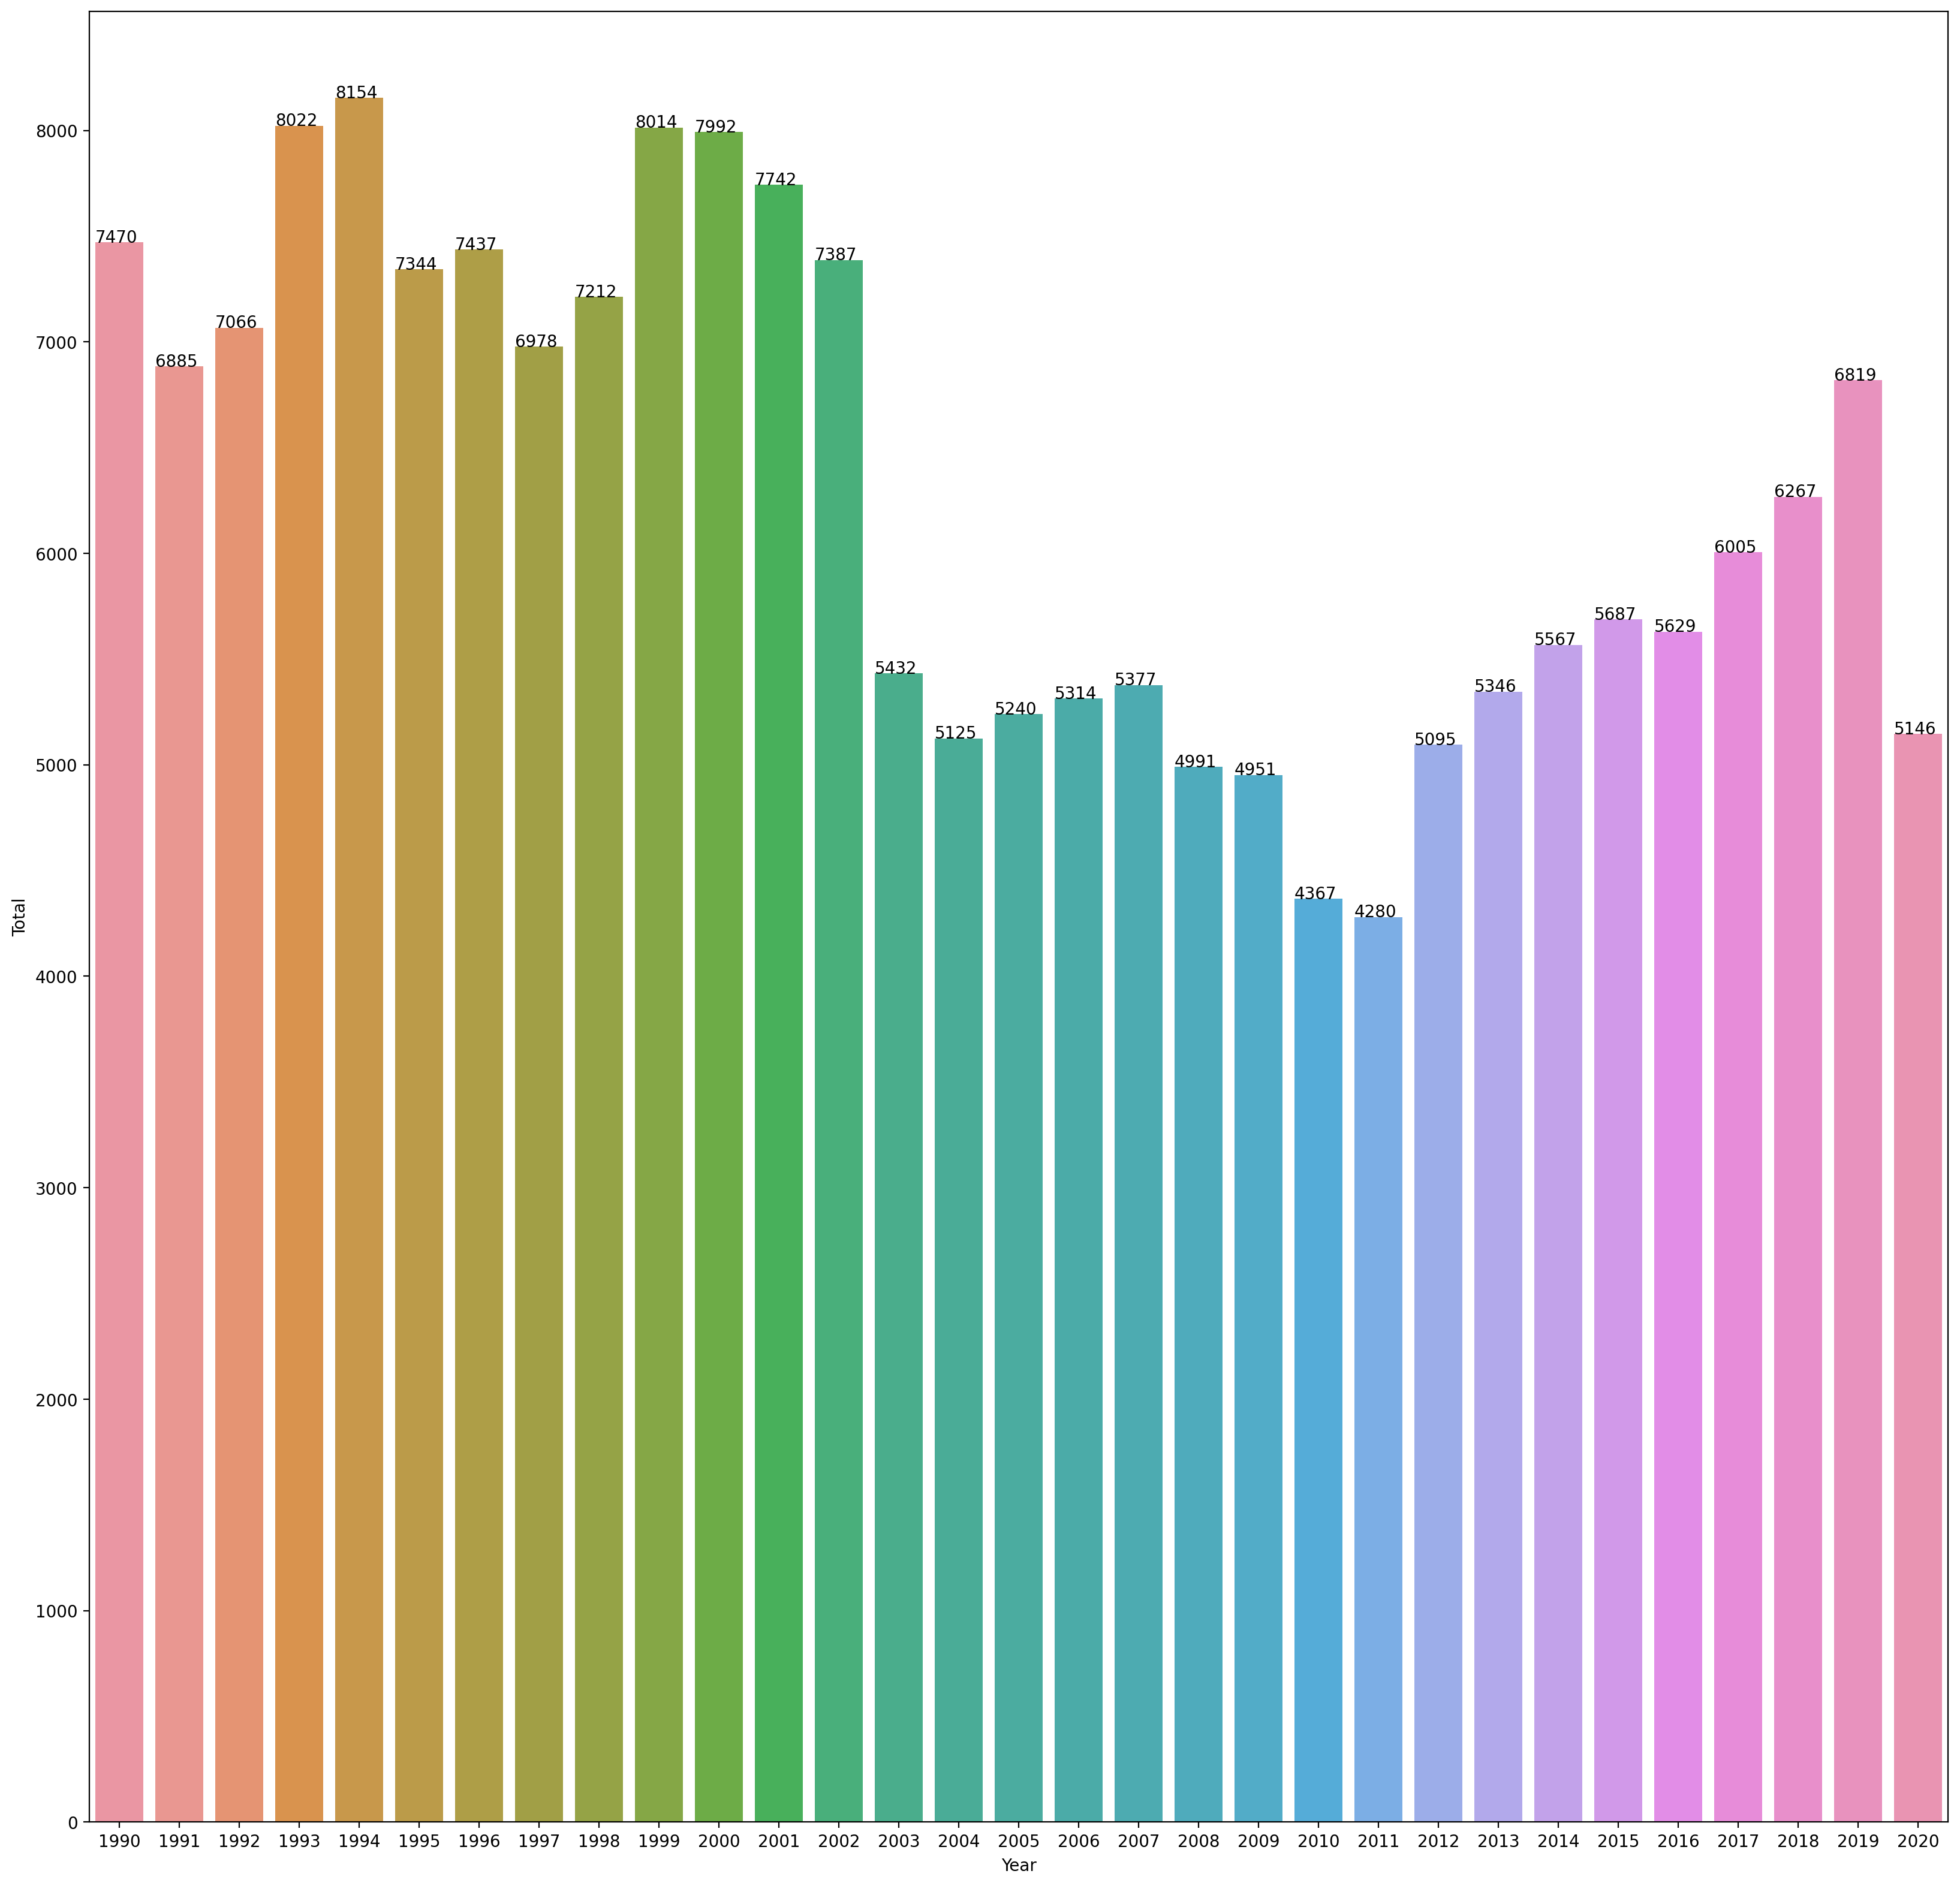

In [15]:
plt.figure(figsize=(20,20), dpi = 200)
ax = sns.barplot(data = df_pass[df_pass['fg_apt'] == 'YYZ'] , x ='Year', y='Total', ci=None )
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x() ,p.get_height()))

**More traffic was observed in earlier days. The incoming traffic at YYZ has decreased over the period of time.**

<Figure size 20000x400 with 0 Axes>

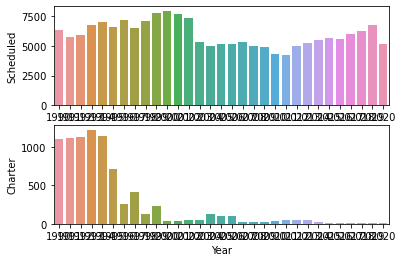

In [16]:
plt.figure(figsize=(100,2), dpi = 200)
fig,axes = plt.subplots(2)
sns.barplot(ax = axes[0], data = df_pass[df_pass['fg_apt'] == 'YYZ'] , x ='Year', y='Scheduled', ci=None)
sns.barplot(ax = axes[1], data = df_pass[df_pass['fg_apt'] == 'YYZ'] , x ='Year', y='Charter', ci=None )

plt.show()

**Chartered flights incoming traffic at YYZ decreased drastically.**

## From which airport did YYZ received maximm traffic?

In [17]:
df_pass[df_pass['fg_apt'] == 'YYZ']['usg_apt'].value_counts().head() 

ORD    2103
MCO    1593
EWR    1549
FLL    1410
LGA    1325
Name: usg_apt, dtype: int64

**Maximum traffic used observed from ORD chicago airport**